
## k-means Clustering-based Classification: Demonstration of k-mean clustering for classification with hyperparameter tuning.

#### Tri Pham
#### Hildebrand Austin Department of Petroleum and Geosystems Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences

##### [GoogleScholar](https://scholar.google.com/citations?user=oTRnjzoAAAAJ&hl=en&authuser=1)  | [LinkedIn](https://www.linkedin.com/in/tri-pham-391b45116/)


_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### Executive Summary

K-means clustering is an unsupervised machine learning method to find patterns in any subsurface data sets. This clustering method attempts to classify data without having first been trained with labeled data. The hyperparameters for k-mean clustering are the number of clusters, and the initial position of clusters. The modification of the initial synthetic data creation and k-means clustering hyperparameters allows for the observation of k-means clustering in action, as opposed to just getting a single result. The modification of k will change the total number of clusters. Additionally, changing the random state of the initial cluster locations will change the specific classifications of cluster and cluster boundaries. The objective of this workflow is to interactively demonstrate k selection for k-means clustering. 


### Workflow Steps

This workflow is broken up to the following primary steps:

1. Import necessary packages and creation of centroid function. 

2. Create of synthetic cluster data. 

3. Normalize data and put them into a single data frame, there is an option in the interactive exercise to change this option.

4. Apply k-means clustering to data frame.

5. Modify k and random state to observe k-means clustering. 

6. Create elbow plot (WCSS vs. k) for k selection. 


For this workflow I have modified code from the tutorial provided by Dr. Michael Pyrcz in his original SubsurfaceDataAnalytics_Clustering. 

### Import Packages

```python
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from sklearn.metrics import mean_squared_error          # model error calculation
import scipy                                            # kernel density estimator for PDF plot
from matplotlib.pyplot import cm                        # color maps
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import copy                                             # for deep copies
import math                                             # for square root function
from sklearn.datasets import make_blobs                 # for generating synthetic clusters
from sklearn.preprocessing import MinMaxScaler          # min/max normalization
from sklearn.cluster import KMeans                      # k-means clustering
from kneed import KneeLocator                           # find the elbow, install the package with 'pip install kneed'
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings('ignore')
cmap = plt.cm.inferno
```

In [1]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
from sklearn.metrics import mean_squared_error          # model error calculation
import scipy                                            # kernel density estimator for PDF plot
from matplotlib.pyplot import cm                        # color maps
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import copy                                             # for deep copies
import math                                             # for square root function
from sklearn.datasets import make_blobs                 # for generating synthetic clusters
from sklearn.preprocessing import MinMaxScaler          # min/max normalization
from sklearn.cluster import KMeans                      # k-means clustering
from kneed import KneeLocator                       # to find the elbow of a curve, install the package with pip install kneed
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings('ignore')
cmap = plt.cm.inferno

### Create Data

Instad of loading data, we will create our own synthetic dataset with the make_blobs function (code modified from Cory Maklin, https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203)

```python
X, Y = make_blobs(n_samples=400, centers=5, cluster_std=0.5, random_state=100)    # to create synthetic clusters
```

This makes the exercise more interactive and flexible, since you will have the chance to create any clustering data. All the data used in this interactive educational product will be unitless to explore the hyper-parameters for k-means clustering. This function is able to create synthetic cluster data with the following properties:

1. n_samples: number of total samples
2. centers: number of clusters
3. cluster_std: standard deviation of samples within one cluster
4. random_state: random seed of clusters
5. center_box: change the scale of x and y axis

These properties can be modified extensively to observe the effect the initial cluster data on k-means clustering.
Feel free to change them to make your own dataset!

Let's take a look at the synthetic data created by our function. 

```python
plt.scatter(X[:,0], X[:,1])    # to plot our initial clusters
```


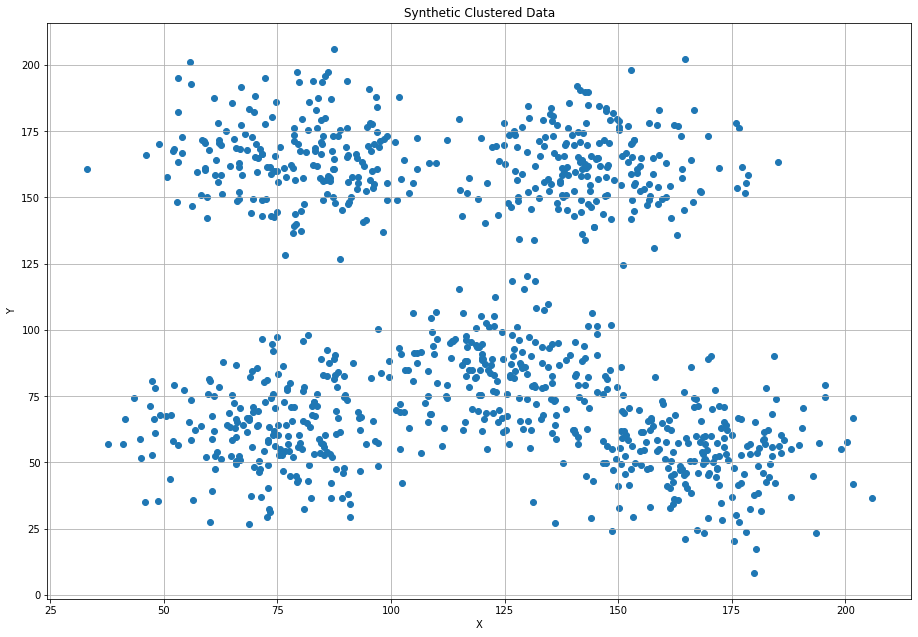

In [2]:
center_box = (50, 200)
original_seed=10
original_k=5
X, Y = make_blobs(n_samples=1000, centers=original_k, cluster_std=15, random_state=original_seed,center_box=center_box)
df=pd.DataFrame(data=X, columns=["X", "Y"])
col = ['X','Y']
df = df[[col[0],col[1]]]
plt.scatter(X[:,0], X[:,1])
plt.title('Synthetic Clustered Data'); plt.xlabel('X'); plt.ylabel('Y')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.grid()
plt.show()

### Data normalization

We will apply min/max normalization (min = 0, max = 1) to our data prior to applying k-means clustering to normalize our scale for both axes using the MinMaxScaler function. 

```python
transform = MinMaxScaler(); 
```

### Create data frame

We will create a new data frame, A, with only normalized x and y values. This is more convienient to work with since there will be only two columns that we are interested in working with.   

```python
A=pd.DataFrame()
```

### Apply k-means clusteering to data

The hyperparameters in k-means clustering are: 

k: number of initial prototypes
seed: random state of initial prototypes, represents the initial location of the prototypes. 
Data normalization: specific to this interactive exercise. Normalize data = 1, else = 0. 

Apply k-means clustering to the normalized data with the KMeans function. This code is modified from Dr.Michael Pyrcz, https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_clustering.ipynb. 


```python
kmeans = KMeans(n_clusters=ncluster, random_state=math.trunc(seed)).fit(df[['nX','nY']])

```
Plot the k-means clustering results. 

```python
plt.scatter(A['nX'], A['nY'], c=A['color'], alpha = 0.8, linewidths=1.0, edgecolors="black", cmap = cmap)
```
Make sure to change the initial number of cluster, the random state, and the data normalization toggle to see k-means clustering in action!



In [3]:
import warnings; warnings.simplefilter('ignore')
from random import randint

colors=[]
for i in range(21):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
        colmap = colors

style = {'description_width': 'initial'}
l = widgets.Text(value='                                                    Demonstration of K-means Clustering Hyperparameters, Tri Pham, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

ncluster = widgets.IntSlider(min=1, max = 20, value=1, step = 1, description = 'k',orientation='horizontal', style = {'description_width': 'initial'}, continuous_update=False)
seed = widgets.IntSlider(min=0, max = 10000, value=50, step = 50, description = 'Seed',orientation='horizontal',style = {'description_width': 'initial'}, continuous_update=False)
dnorm = widgets.IntSlider(min=0, max = 1, value=0, step = 1, description = 'Data Normalization',orientation='horizontal',style = {'description_width': 'initial'}, continuous_update=True)

uipars = widgets.HBox([ncluster,seed,dnorm],) 
uik = widgets.VBox([l,uipars],)

def f_make_kmeans(ncluster,seed,dnorm):
    if dnorm == 1:
        transform = MinMaxScaler(); 
        features = [col[0],col[1]]
        df['n' + col[0]] = transform.fit_transform(df.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
        df['n' + col[1]] = transform.fit_transform(df.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0      
        A=pd.DataFrame()
        A['nX']=df['nX']
        A['nY']=df['nY']
        X_min = np.min(A['nX']); X_max=np.max(A['nX'])
        Y_min = np.min(A['nY']); Y_max = np.max(A['nY'])
        Xmin=X_min; Xmax=X_max
        Ymin=Y_min; Ymax=Y_max  
        kmeans = KMeans(n_clusters=ncluster, random_state=math.trunc(seed)).fit(A[['nX','nY']])
        A['kMeans'] = kmeans.labels_ + 1
        A['color'] = A['kMeans'].map(lambda x: colmap[x])
        fig  = plt.figure(num=1, clear=True)
        axL  = fig.add_subplot(2, 2, 1)
        axL2 = fig.add_subplot(2, 2, 3)
        axR1 = fig.add_subplot(2, 2, 2)
        axR2 = fig.add_subplot(2, 2, 4)
        axL.scatter(A['nX'], A['nY'], c=A['color'], alpha = 0.8, linewidths=1.0, s=50,edgecolors="black", cmap = cmap,)
        axL.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],linewidths=1,edgecolors="black", s=150, c='red', label='Cluster center')
        axL.legend(loc="upper left")
        axL.set_title('Normalized ' + col[1] + ' vs. ' + col[0] + ' with k-Means Clusters');axL.set_xlabel('nX');axL.set_ylabel('nY')
        axL.grid()
        axR1.hist(A['kMeans'],alpha=0.2,color="red",edgecolor="black",bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5],range=[0.5,2.5],density = True)
        axR1.set_xticks(np.arange(1, 21, 1.0))
        axR1.set_xlim(0.5,20.5)
        axR1.set_title('Cluster Proportions')
        axR1.set_xlabel('Cluster')
        axR1.set_ylabel('Proportion')
        for m in range(1,ncluster+1):
            axR2.hist(A[A['kMeans'] == m].nY,color=colmap[m],alpha=0.3,bins=20,edgecolor="black",density=True,label=['Cluster '+ str(m)])
            axR2.legend(loc="upper left")
            axR2.set_title('nY distribution')
            axR2.set_xlabel('nY')
            axR2.set_ylabel('Frequency')
        for n in range(1,ncluster+1):
            axL2.hist(A[A['kMeans'] == n].nX,color=colmap[n],alpha=0.3,bins=20,edgecolor="black",density=True,label=['Cluster '+ str(n)])
            axL2.legend(loc="upper left")
            axL2.set_title('nX distribution')
            axL2.set_xlabel('nX')
            axL2.set_ylabel('Frequency')
        plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=2.5, wspace=0.2, hspace=0.2)

    elif dnorm ==0:
        A=pd.DataFrame()
        A['nX']=df['X']
        A['nY']=df['Y']
        X_min = np.min(A['nX']); X_max=np.max(A['nX'])
        Y_min = np.min(A['nY']); Y_max = np.max(A['nY'])
        kmeans = KMeans(n_clusters=ncluster, random_state=math.trunc(seed)).fit(A[['nX','nY']])
        A['kMeans'] = kmeans.labels_ + 1
        A['color'] = A['kMeans'].map(lambda x: colmap[x])
        fig  = plt.figure(num=1, clear=True)
        axL  = fig.add_subplot(2, 2, 1)
        axL2 = fig.add_subplot(2, 2, 3)
        axR1 = fig.add_subplot(2, 2, 2)
        axR2 = fig.add_subplot(2, 2, 4)
        axL.scatter(A['nX'], A['nY'], c=A['color'], alpha = 0.8, linewidths=1.0, s=50,edgecolors="black", cmap = cmap,)
        axL.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],linewidths=1,edgecolors="black", s=150, c='red', label='Cluster center')
        axL.legend(loc="upper left")
        axL.set_title('Y vs. X with k-Means Clusters');axL.set_xlabel('X');axL.set_ylabel('Y')
        axL.grid()
        axR1.hist(A['kMeans'],alpha=0.2,color="red",edgecolor="black",bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5],range=[0.5,2.5],density = True)
        axR1.set_xticks(np.arange(1, 21, 1.0))
        axR1.set_xlim(0.5,20.5)
        axR1.set_title('Cluster Proportions')
        axR1.set_xlabel('Cluster')
        axR1.set_ylabel('Proportion')
        for m in range(1,ncluster+1):
            axR2.hist(A[A['kMeans'] == m].nY,alpha=0.3,color=colmap[m],bins=20,edgecolor="black",density=True,label=['Cluster '+ str(m)])
            axR2.legend(loc="upper left")
            axR2.set_title('Y distribution')
            axR2.set_xlabel('Y')
            axR2.set_ylabel('Probability density')
        for n in range(1,ncluster+1):
            axL2.hist(A[A['kMeans'] == n].nX,alpha=0.3,color=colmap[n],bins=20,edgecolor="black",density=True,label=['Cluster '+ str(n)])
            axL2.legend(loc="upper left")
            axL2.set_title('X distribution')
            axL2.set_xlabel('X')
            axL2.set_ylabel('Probability density')
        plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=2.5, wspace=0.2, hspace=0.2)

interactive_plot = widgets.interactive_output(f_make_kmeans, {'ncluster':ncluster, 'seed':seed,'dnorm':dnorm})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating
display(uik, interactive_plot)                            # display the interactive plot

Output()

### Observations

From the above interactive exercise, we can see that:

1. Changing the number of initial prototypes k will change the total number of clusters. 
2. Changing the initial position of the initial prototypes (random state) will change the specific classification and the boundary of clusters. 
3. If too many histograms overlap in both the X and Y components distribution plots, the model may be overfitted. 


### Within Cluster Sum of Squares for K selection
We can also select the number of initial number of prototype by using the elbow method (code modified from Cory Maklin, https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203). This method plots the within cluster sum of squares (WCSS) vs. k. We train multiple models using a different number of clusters and storing the value of the WCSS for every k.

```python
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=1000)
    kmeans.fit(A[['nX','nY']])
    wcss.append(kmeans.inertia_)
```
The best k is where the change in WCSS begins to level off. We can do this with the kneed function, which finds the elbow of a curve automatically (code modified from Kevin Arvai, https://pypi.org/project/kneed/). This package can be installed from the Anaconda command window, 'pip install kneed'. The elbow curve for k-means clustering will always be convex and decreasing, since the within cluster sum of squares will always decrease as the number of intial clusters increases. 
```python
kn = KneeLocator(
    range(1, 21),
    wcss,
    curve='convex',
    direction='decreasing',
    interp_method='polynomial',)
```


In [ ]:
transform = MinMaxScaler(); 
features = [col[0],col[1]]
df['n' + col[0]] = transform.fit_transform(df.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
df['n' + col[1]] = transform.fit_transform(df.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0      
A=pd.DataFrame()
A['nX']=df['nX']
A['nY']=df['nY']
X_min = np.min(A['nX']); X_max=np.max(A['nX'])
Y_min = np.min(A['nY']); Y_max = np.max(A['nY'])
Xmin=X_min; Xmax=X_max
Ymin=Y_min; Ymax=Y_max  
   
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=original_seed)
    kmeans.fit(A[['nX','nY']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.xticks(np.arange(1, 21, 1.0))
plt.plot([original_k,original_k],[0,100],color = 'black',linestyle='dashed')
plt.text(original_k+0.1, 60, r'True number of clusters')
plt.xlim(1,20)
plt.ylim(0,100)
plt.title('Elbow Method for K-means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

kn = KneeLocator(
    range(1, 21),
    wcss,
    curve='convex',
    direction='decreasing',
    interp_method='polynomial',)
plt.plot([kn.knee,kn.knee],[0,100],color = 'red',linestyle='dotted')
string="Number of cluster using elbow method"
plt.text(kn.knee+0.1, 40,string,color = 'red')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.grid()
plt.show()




### Elbow plot observations
From the above elbow plot, we can see that:
1. The true number of cluster will be equal to the number of cluster from the elbow method if there are natural clusters. 
2. The elbow method isn't "one size fits all", it works best for lower number of clusters with lower standard deviation. 
3. The slope of the elbow becomes more gradual and less distinctive as the standard deviation within clusters increases. 
4. Increasing the number of clusters extensively leads to a lower within cluster sum of squares, which would lead to overfit.


I hope this interactive exercise on k-means clustering was helpful,

Tri Pham

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
